# Ordinary Least Squares in Statsmodels (OLS) - Lab

## Introduction

In the previous code along, we looked all the requirements for running an ols simple regression using statsmodels. We worked with a toy example to understand the process and all the necessary steps that must be performed. In this lab , we shall look at a slightly more complex example to study the impact of spendings in different advertising channels of total sales.

## Objectives

You will be able to:
* Set up an analytical question to be answered by regression analysis
* Study regression assumptions for real world datasets
* Visualize the results of regression analysis

## Let's get started

In this lab, we will work with the "Advertising Dataset" which is a very popular dataset for studying simple regression. [The dataset is available at Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have already downloaded for you. It is available as "Advertising.csv". We shall use this dataset to ask ourselves a simple analytical question:

## The Question

Which advertising channel has a strong relationship with sales volume, and can be used to model and predict the sales. 

### Step 1: Read the dataset and inspect its columns and 5-point statistics

In [1]:
# Load necessary libraries and import the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
# Check the columns and first few rows


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [37]:
# Get the 5-point statistics for data 


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [42]:
# Describe the contents of this dataset


### Step 2: Plot histograms with kde overlay to check for the normality of the predictors

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


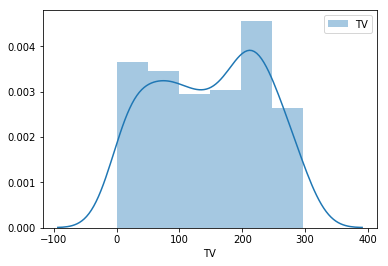

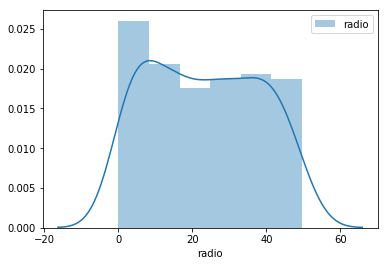

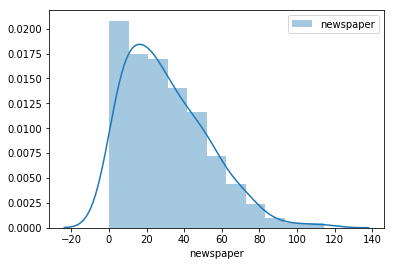

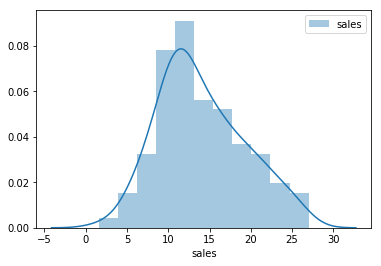

In [18]:
for col in df.columns:
    sns.distplot(df[col], label= col)
    plt.legend()
    plt.show()

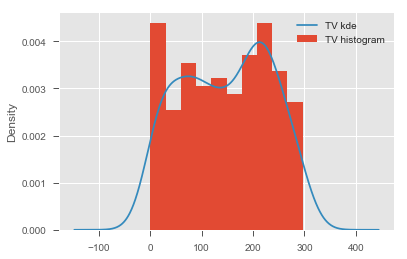

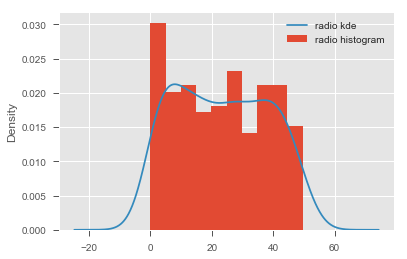

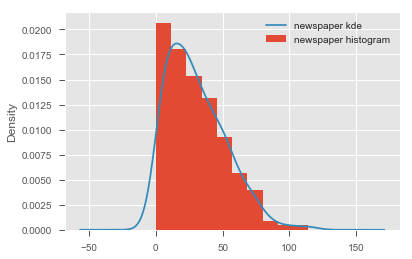

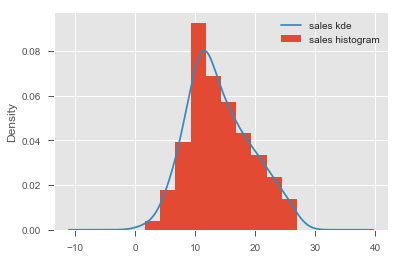

In [64]:
# For all the variables, check if they hold normality assumption


In [4]:
# Record your observations on normality here 

#### Remember . Nothing is perfect . So be positive 
<img src="https://4.bp.blogspot.com/-e-CL8iluz2o/Vt3Ntg_38kI/AAAAAAAAIJo/zGJMyNaMbFY/s1600/skewed.jpg" width=400>

### Step 3: Test for the linearity assumption. 
Use scatterplots to plot each predictor against the target variable

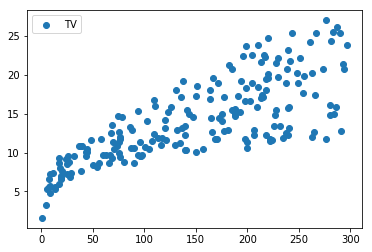

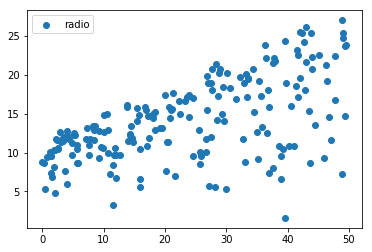

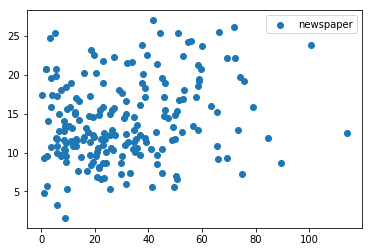

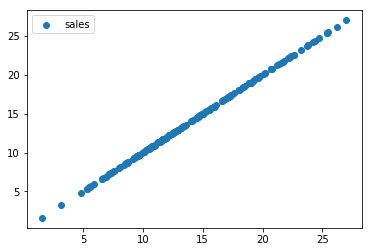

In [22]:
for col in df.columns:
    plt.scatter(df[col], df['sales'], label=col)
    plt.legend()
    plt.show()

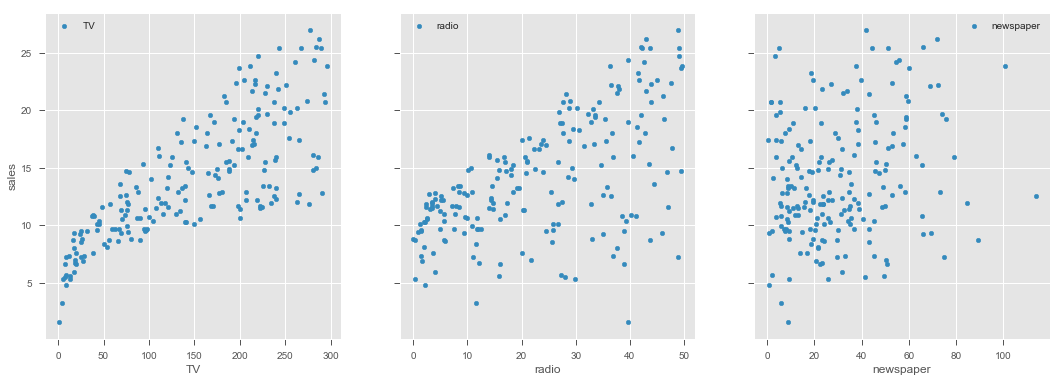

In [57]:
# visualize the relationship between the preditors and the target using scatterplots


In [ ]:
# Record yor observations on linearity here 

### Conclusion so far !

Based on above initial checks, we can confidently say that TV and radio appear to be good predictors for our regression analysis. Newspaper is very heavily skewed and also doesnt show any clear linear relationship with the target. 
> We shall move ahead with our analysis using TV and radio , and count out the newspaper due to the fact that data violates ols assumptions

Note: Kurtosis can be dealt with using techniques like log normalization to "push" the peak towards the center of distribution. We shall talk about this in the next section. 

### Step 4: Run a simple regression in `statsmodels` with TV as a predictor

In [6]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula 
f = 'sales~TV'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()

### Step 5: Get regression diagnostics summary


In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           1.47e-42
Time:                        16:39:42   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Record your observations on "Goodness of fit"


Note here that the coefficients represent associations, not causations


### Step 6:  Draw a prediction line with data points omn a scatter plot for X (TV) and Y (Sales)

Hint: We can use `model.predict()` functions to predict the start and end point of of regression line for the minimum and maximum values in the 'TV' variable. 

      TV
0    0.7
1  296.4


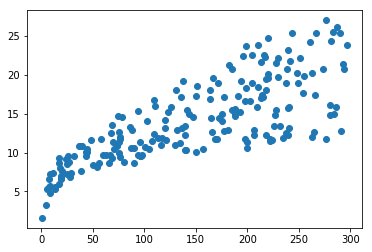

In [32]:
# create a DataFrame with the minimum and maximum values of TV
x_new = pd.DataFrame({'TV': [df.TV.min(), df.TV.max()]})
print(x_new)
# make predictions for those x values and store them
model.predict(x_new)

# first, plot the observed data and the least squares line

plt.scatter(df.TV, df.sales)


      TV
0    0.7
1  296.4
0     7.065869
1    21.122454
dtype: float64


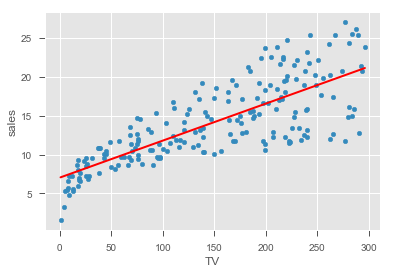

### Step 7: Visualize the error term for variance and heteroscedasticity

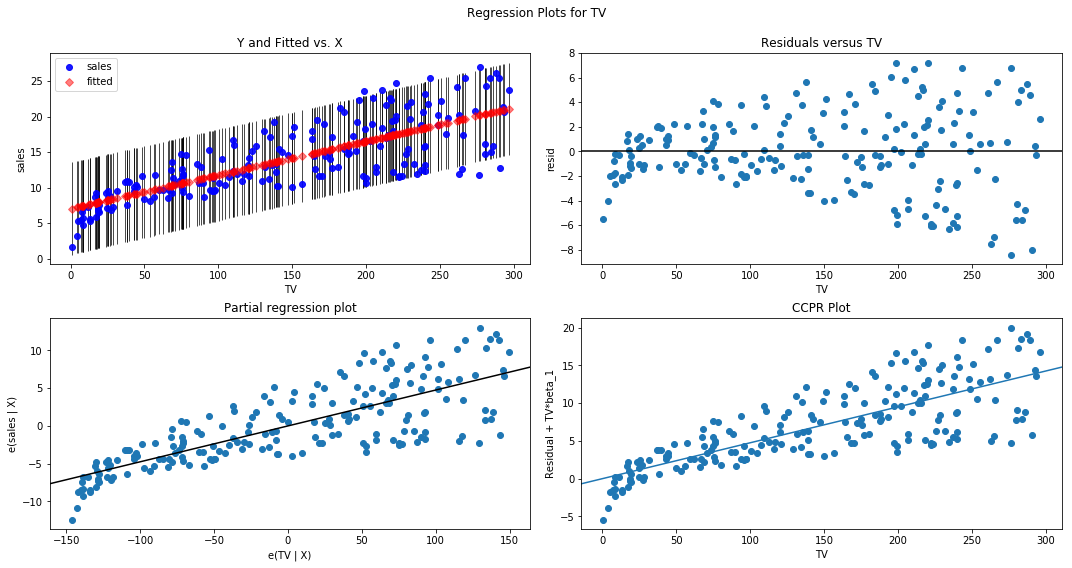

In [8]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "TV", fig=fig)
plt.show()

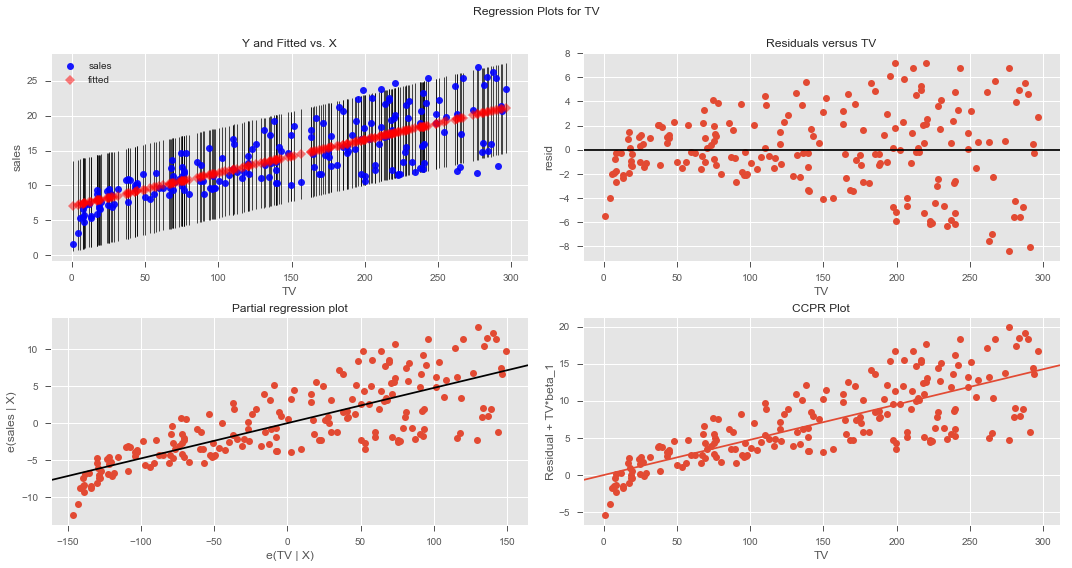

In [ ]:
# Record Your observations on residuals

### Next, repeat above for radio and go through the same process, recording your observations

R-Squared: 0.33203245544529525
Intercept    9.311638
radio        0.202496
dtype: float64


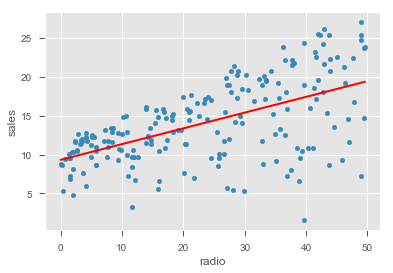

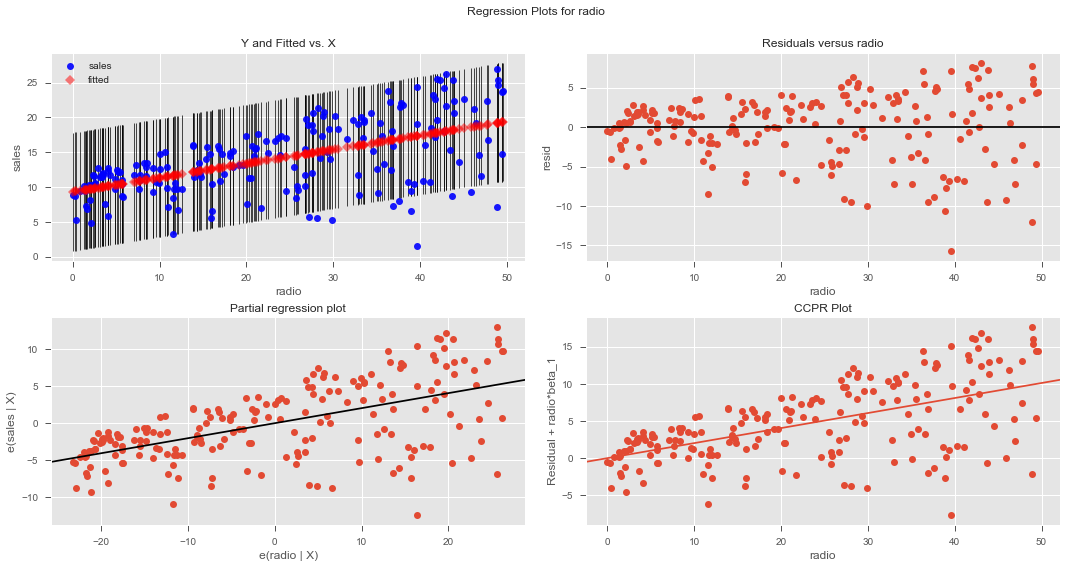

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           4.35e-19
Time:                        20:52:55   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Record your observations here for goodnes of fit 

## The Answer


Based on above analysis, we can conclude that none of the two chosen predictors is ideal for modeling a relationship with the sales volumes. `Newspaper` clearly violated normality and linearity assumptions. TV and radio did not provide a high value for co-efficient of determination - TV performed slightly better than the radio. There is obvious heteroscdasticity in the residuals for both variables. 

> We can either look for further data, perform extra pre-processing or use more advanced techniques. 

Remember there are lot of technqiues we can employ to FIX this data. 

Whether we should call TV the "best predictor" or label all of them "equally useless", is a domain specific question and a marketing manager would have a better opinion on how to move forward with this situation. 

In the following lesson, we shall look at the more details on interpreting the regression diagnostics and confidence in the model. 

## Summary

In this lesson, we ran a complete regression analysis with a simple dataset. We looked for the regression assumptions pre and post the analysis phase. We also created some visualizations to develop a confidence on the model and check for its goodness of fit. 